In [2]:
# for autoreloading edited the modules and packages instead of restarting the kernel
%reload_ext autoreload
%autoreload 2

## Neural Network model

In [3]:

# from pandas import DataFrame
# from sklearn.model_selection import KFold
# from torch.utils.data import DataLoader, Dataset

# from dataset.data import IcoDataset
# from neural_network.model import IcoPredictor

# from neural_network.params_utils import (
#     param_generator,
#     HyperParameterLogger,
#     tune_hyperparameters,
#     find_best_hyperparameter,
# )


### 1. hyperparameter tuning

In [4]:
from pathlib import Path
import torch
from neural_network.params_utils import param_generator

In [5]:
log_version = 3
params = {
    "data_path": Path("data_preprocess") / "cleaned_ico_dataset.csv",
    "log_path": Path("neural_network") / "logs" / f"log_v{log_version}.csv",
    "epochs": 10,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "params": param_generator(),
}


In [6]:
from neural_network.params_utils import tune_hyperparameters


In [7]:
tune_hyperparameters(**params)


{'batch_size': 32, 'hidden_layers': 4, 'layer_units': 16, 'learning_rate': 0.05714797369919415, 'normalize': True, 'one_hot_encode': True, 'epochs': 10, 'data_path': WindowsPath('data_preprocess/cleaned_ico_dataset.csv'), 'device': 'cuda'}
validation loss : (25.825196017825903, [array([1236.98565674, 1107.7109375 ,  912.73916626,  860.24534607,
        937.2677002 ,  821.38627625, 1628.51016235,  884.00509644,
        778.83808517, 1142.45111084]), array([1190.5788269 ,  747.7388916 ,  699.75393677,  790.6244812 ,
        595.0594101 ,  584.51260376,  654.88450623,  734.79641724,
        838.9854126 ,  798.27081299]), array([1566.05938721, 1044.63256836, 1735.34613037,  926.94975281,
        917.07531738, 1484.01675415,  861.75260925, 1433.38671875,
        825.35063171,  795.67301941]), array([535.03170013, 782.29187012, 749.36743164, 590.25213623,
       560.25210571, 698.09298706, 507.58851624, 870.74414062,
       539.08326721, 673.97454834]), array([ 755.97454834,  872.95379639,  

In [8]:
import pandas as pd
from neural_network.params_utils import find_best_hyperparameter

In [27]:
# log_path independant
log_path = Path("neural_network") / "logs" / f"log_v{log_version}.csv"
log_df = pd.read_csv(log_path)

# log_df = pd.read_csv(params["log_path"])
best_hyperparameter, min_val_loss_idx = find_best_hyperparameter(log_df, "val_loss")
best_hyperparameter[0][:-2], min_val_loss_idx


(array([32, 4, 32, 0.0881395812224631, False, False, 10,
        'data_preprocess\\cleaned_ico_dataset.csv', 'cuda'], dtype=object),
 (array([35], dtype=int64),))

In [38]:
best_params = log_df.iloc[min_val_loss_idx].to_dict(orient="records")[0]
type(best_params)

dict

In [39]:
# it was handled with adding **kwargs to run_with_kfold function.

# best_params = log_df.iloc[min_val_loss_idx].to_dict(orient="records")[0]
# best_params = dict(list(best_params.items())[:-2])
# del best_params["val_loss"]; del best_params["train_time"]



### 2. training and validating the model

In [40]:
from neural_network.train_utils import run_with_kfold


In [47]:
best_params.keys()

dict_keys(['batch_size', 'hidden_layers', 'layer_units', 'learning_rate', 'normalize', 'one_hot_encode', 'epochs', 'data_path', 'device', 'val_loss', 'train_time'])

In [55]:
# best_params["learning_rate"] = 1e-7
best_params["epochs"] = 300
best_params["data_path"] = Path("data_preprocess") / "cleaned_ico_dataset.csv"
mean_val_loss, folds_val_losses, folds_train_losses = run_with_kfold(**best_params)
mean_val_loss


18.657324668308867

In [56]:
import numpy as np


In [57]:
val_losses = np.concatenate([a[None] for a in folds_val_losses], axis=0)
train_losses = np.concatenate([a[None] for a in folds_train_losses], axis=0)
folds_mean_val_losses = val_losses.mean(axis=0)**0.5
folds_mean_train_losses = train_losses.mean(axis=0)**0.5

In [58]:
from matplotlib import pyplot as plt


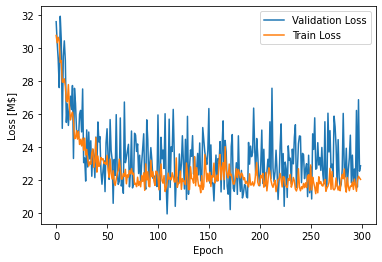

In [59]:
step = 1
# fold = 0

plt.plot(folds_mean_val_losses[::step], label="Validation Loss")
plt.plot(folds_mean_train_losses[::step], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss [M$]")
plt.legend()
plt.show()


In [ ]:
# step = 10
# plt.plot(val_losses[fold][::step]**0.5, label="Validation Loss")
# plt.plot(train_losses[fold][::step]**0.5, label="Train Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss [M$]")
# plt.legend()
# plt.show()

### 3. applying the model

In [ ]:
# TODO
